In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Define la estructura del modelo

# Model definition
dropout_rate = 0.5
number_raster_layers = 9
number_pixels_layer = 19

class CNNRegressor(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()
        self.conv1 = nn.Conv2d(number_raster_layers, 16, kernel_size=3, stride=1, padding=1)
        self.selu1 = nn.SELU()
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.selu2 = nn.SELU()
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.selu3 = nn.SELU()
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.selu4 = nn.SELU()
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.selu5 = nn.SELU()
        self.conv6 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.selu6 = nn.SELU()
        # self.dropout = nn.Dropout(dropout_rate)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(512 * number_pixels_layer * number_pixels_layer, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.selu1(x)
        x = self.conv2(x)
        x = self.selu2(x)
        x = self.conv3(x)
        x = self.selu3(x)
        x = self.conv4(x)
        x = self.selu4(x)
        x = self.conv5(x)
        x = self.selu5(x)
        x = self.conv6(x)
        x = self.selu6(x)
        x = self.flatten(x)
        # x = self.dropout(x)
        x = self.fc(x)
        return x

model = CNNRegressor()

In [3]:
# Load model
path_model = '../Data/Calibrated_models/global_regressor_V0.pth'
model.load_state_dict(torch.load(path_model))


<All keys matched successfully>

In [4]:
# Cambia el modelo al modo de evaluación (si es necesario)
model.eval()

CNNRegressor(
  (conv1): Conv2d(9, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (selu1): SELU()
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (selu2): SELU()
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (selu3): SELU()
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (selu4): SELU()
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (selu5): SELU()
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (selu6): SELU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=184832, out_features=1, bias=True)
)

In [5]:
# Load tensors
path_tensor_train = '../Data/Calibrated_models/global_regressor_V0_tensor_y_train.pth'
y_train = torch.load(path_tensor_train)

path_tensor_test = '../Data/Calibrated_models/global_regressor_V0_tensor_y_test.pth'
y_test = torch.load(path_tensor_test)

path_tensor_test = '../Data/Calibrated_models/global_regressor_V0_test_tensor.pth'
test_tensor = torch.load(path_tensor_test)

path_tensor_training = '../Data/Calibrated_models/global_regressor_V0_training_tensor.pth'
training_tensor = torch.load(path_tensor_training)

In [6]:
# Extrayendo el valor de la primera dimensión
total_number_test_sites = test_tensor.shape[0]
print(total_number_test_sites)

170


In [7]:
input_tensor_number = 90 # 13, 81, 90, 132
input_tensor_raw = test_tensor[input_tensor_number].unsqueeze(0) #9

In [8]:
input_tensor_raw.shape

torch.Size([1, 9, 19, 19])

In [9]:
# Convertir el tensor de entrada a float para manipularla con la CNN
input_tensor = input_tensor_raw.float()

In [10]:
# Realizar un paso hacia adelante para obtener las activaciones
output = model(input_tensor)
print(output)

tensor([[-2.0414]], grad_fn=<AddmmBackward0>)


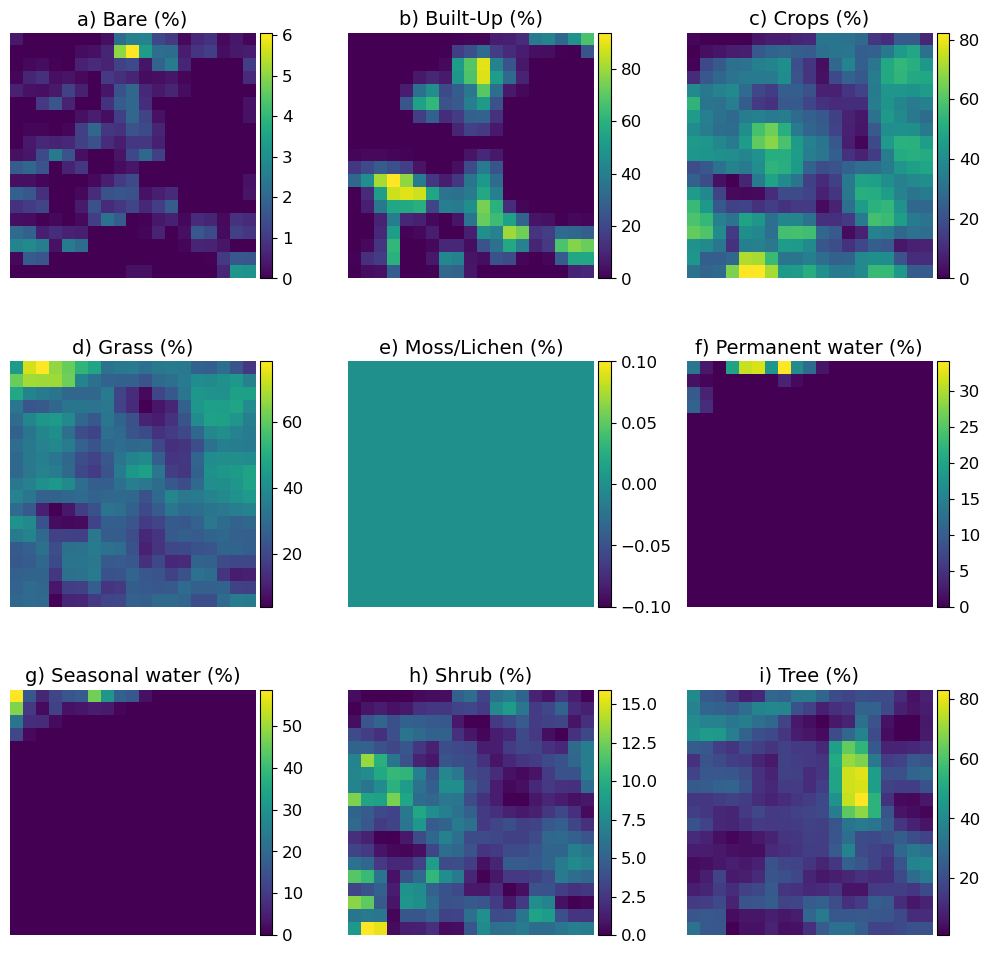

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Asumiendo que input_tensor es de la forma [1, 9, height, width]
# y ya lo has seleccionado correctamente para que tenga esta forma.
# Aquí hay una simulación de input_tensor para el propósito de este ejemplo.
import numpy as np

# Nombrar las capas según la información proporcionada
layer_names = [
    "a) Bare (%)", "b) Built-Up (%)", "c) Crops (%)", "d) Grass (%)", "e) Moss/Lichen (%)",
    "f) Permanent water (%)", "g) Seasonal water (%)", "h) Shrub (%)", "i) Tree (%)"
]

# Crear una figura para plotear
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))  # Ajusta el tamaño como sea necesario

# Iterar sobre cada capa
for i, ax in enumerate(axes.flatten()):
    # Mostrar la imagen de la capa
    im = ax.imshow(input_tensor[0, i, :, :], cmap='viridis')  # Usa el mapa de colores que prefieras
    ax.set_title(layer_names[i], fontsize=14)  # Aumentar el tamaño de la fuente del título
    ax.axis('off')  # Desactivar los ejes para una mejor visualización

    # Crear una nueva división para la barra de colores
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Agregar la barra de colores
    cbar = plt.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=12)  # Aumentar el tamaño de la fuente de las etiquetas de la barra de colores

plt.tight_layout()
plt.show()

# Guardar con una resolución más alta
fig.savefig('../Figures/LC_pixels.png', dpi=300)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb  # Importa específicamente to_rgb

# Supongamos que input_tensor es de la forma [1, 9, height, width]
input_tensor_squeeze = input_tensor.squeeze(0)  # Remover la dimensión del batch

# Definir la paleta de colores según los tipos de cobertura terrestre
color_map = {
    0: 'saddlebrown',   # Bare
    1: 'red',           # BuiltUp
    2: 'yellow',        # Crops
    3: 'lightgreen',    # Grass
    4: 'limegreen',     # MossLichen
    5: 'blue',          # PermanentWater
    6: 'cyan',          # SeasonalWater
    7: 'olive',         # Shrub
    8: 'darkgreen'      # Tree
}

# Determinar la capa dominante para cada píxel
dominant_layer_indices = np.argmax(input_tensor_squeeze, axis=0)

# Crear una imagen RGB vacía
dominant_image = np.zeros((*dominant_layer_indices.shape, 3), dtype=np.uint8)

# Mapear cada índice a su color correspondiente en la imagen RGB
for index, color in color_map.items():
    # Encuentra dónde el índice dominante es igual al índice de la capa actual
    mask = dominant_layer_indices == index
    dominant_image[mask] = np.array(to_rgb(color)) * 255  # Convertir color a RGB y ajustar a escala de 0-255


In [13]:
dominant_image

array([[[  0, 255, 255],
        [144, 238, 144],
        [144, 238, 144],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[144, 238, 144],
        [144, 238, 144],
        [144, 238, 144],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [144, 238, 144]],

       [[144, 238, 144],
        [144, 238, 144],
        [  0, 100,   0],
        ...,
        [255, 255,   0],
        [255, 255,   0],
        [144, 238, 144]],

       ...,

       [[255, 255,   0],
        [255, 255,   0],
        [255, 255,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255, 255,   0],
        [144, 238, 144],
        [144, 238, 144],
        ...,
        [144, 238, 144],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0, 100,   0],
        [144, 238, 144],
        [144, 238, 144],
        ...,
        [255, 255,   0],
        [144, 238, 144],
        [144, 238, 144]]

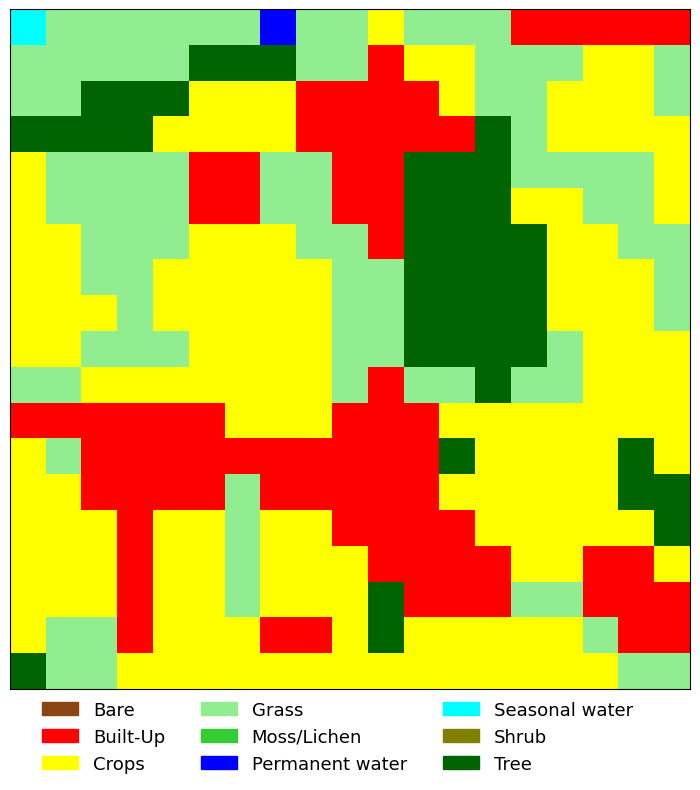

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import matplotlib.patches as mpatches

# Definir la paleta de colores según los tipos de cobertura terrestre
color_map = {
    0: 'saddlebrown',   # Bare
    1: 'red',           # BuiltUp
    2: 'yellow',        # Crops
    3: 'lightgreen',    # Grass
    4: 'limegreen',     # MossLichen
    5: 'blue',          # PermanentWater
    6: 'cyan',          # SeasonalWater
    7: 'olive',         # Shrub
    8: 'darkgreen'      # Tree
}

# Etiquetas para la leyenda basadas en los nombres de las categorías
labels = {
    0: "Bare",
    1: "Built-Up",
    2: "Crops",
    3: "Grass",
    4: "Moss/Lichen",
    5: "Permanent water",
    6: "Seasonal water",
    7: "Shrub",
    8: "Tree"
}

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 10))

# Asumiendo que 'dominant_layer_indices' y 'dominant_image' ya están definidos
ax.imshow(dominant_image)
ax.axis('on')  # Ocultar los ejes

# Crear una lista de parches para la leyenda
patches = [mpatches.Patch(color=to_rgb(color), label=labels[idx]) for idx, color in color_map.items()]

# Añadir la leyenda al gráfico debajo de la figura
fig.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, 0.1), ncol=3, frameon=False, fontsize=13)

# Ajustar los márgenes para que haya espacio para la leyenda
plt.subplots_adjust(bottom=0.2)

# Ocultar las etiquetas de los ejes
ax.xaxis.set_ticks([])  # Oculta las etiquetas y marcas del eje x
ax.yaxis.set_ticks([])  # Oculta las etiquetas y marcas del eje y

# Guardar la figura
fig.savefig('../Figures/Dominant_LC.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


In [17]:
def get_activation(layer, input, output):
    global activation
    activation = torch.relu(output)  # Use ReLU para visualizar mejor las activaciones

In [18]:
# Registrar el hook
hook = model.conv1.register_forward_hook(get_activation)

In [19]:
# Realizar un paso hacia adelante para obtener las activaciones
output = model(input_tensor)

In [20]:
# Remover el hook después de usarlo para evitar leaks de memoria
hook.remove()

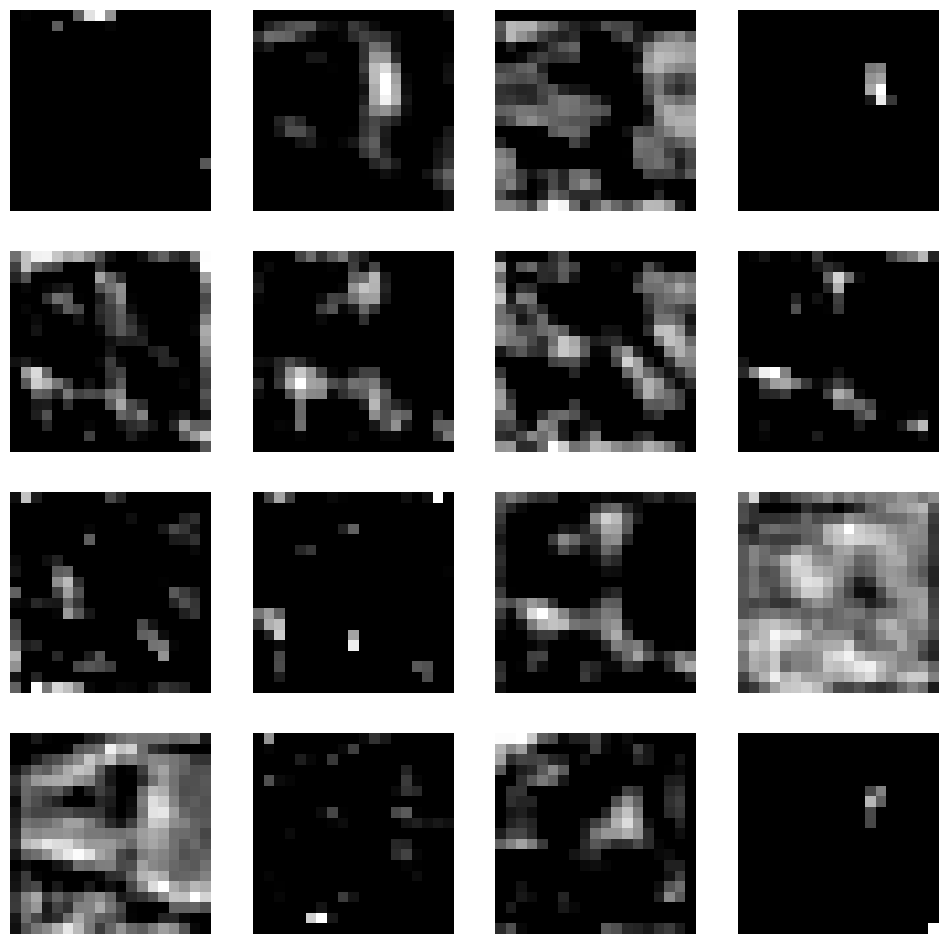

In [58]:
# Verificar que activation está definida
if 'activation' in globals():
    # Visualizar los mapas de activación
    num_plots = activation.shape[1]  # Número de canales en la capa de salida de conv1
    fig, axes = plt.subplots((num_plots + 3) // 4, 4, figsize=(12, (num_plots + 3) // 4 * 3))
    for i, ax in enumerate(axes.flat):
        if i < num_plots:
            ax.imshow(activation[0, i].detach().numpy(), cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.show()
else:
    print("No activation data was recorded.")
    
#NOTA: Las activaciones que se ven son similares a las de la capa SELU1
# Guardar la figura
fig.savefig('../Figures/activation_layer1.png', dpi=300, bbox_inches='tight')

In [22]:
import torch
import torch.nn.functional as F
import random

class GradCAM:
    def __init__(self, model, layer):
        self.model = model
        self.layer = layer
        self.gradient = None
        self.activation = None

        self.hook_handles = []
        self.hook_handles.append(layer.register_forward_hook(self.save_activation))
        self.hook_handles.append(layer.register_backward_hook(self.save_gradient))

    def save_activation(self, module, input, output):
        self.activation = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradient = grad_output[0].detach()

    def __call__(self, x, index=None):
        # Set a fixed seed for reproducibility
        if seed is not None:
            torch.manual_seed(seed)
            torch.cuda.manual_seed_all(seed)
            np.random.seed(seed)
            random.seed(seed)

        # Clear previous gradients and activations
        self.gradient = None
        self.activation = None
        
        output = self.model(x)
        if index is None:
            index = torch.argmax(output)

        self.model.zero_grad()
        output.backward(torch.ones_like(output), retain_graph=True)  # Simplificado

        pooled_gradients = torch.mean(self.gradient, dim=[0, 2, 3])
        for i in range(pooled_gradients.size(0)):
            self.activation[:, i, :, :] *= pooled_gradients[i]
        
        heatmap = torch.mean(self.activation, dim=1).squeeze()
        heatmap = F.relu(heatmap)
        heatmap /= torch.max(heatmap)

        return heatmap

    def release(self):
        for handle in self.hook_handles:
            handle.remove()

In [23]:
# Uso de GradCAM en el modelo con la capa conv6
grad_cam = GradCAM(model, model.conv6)

In [24]:
# Establecer una semilla fija para garantizar la reproducibilidad
seed = 42
# Obtención del mapa de calor
heatmap = grad_cam(input_tensor)
grad_cam.release()

C:\Users\alfon\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


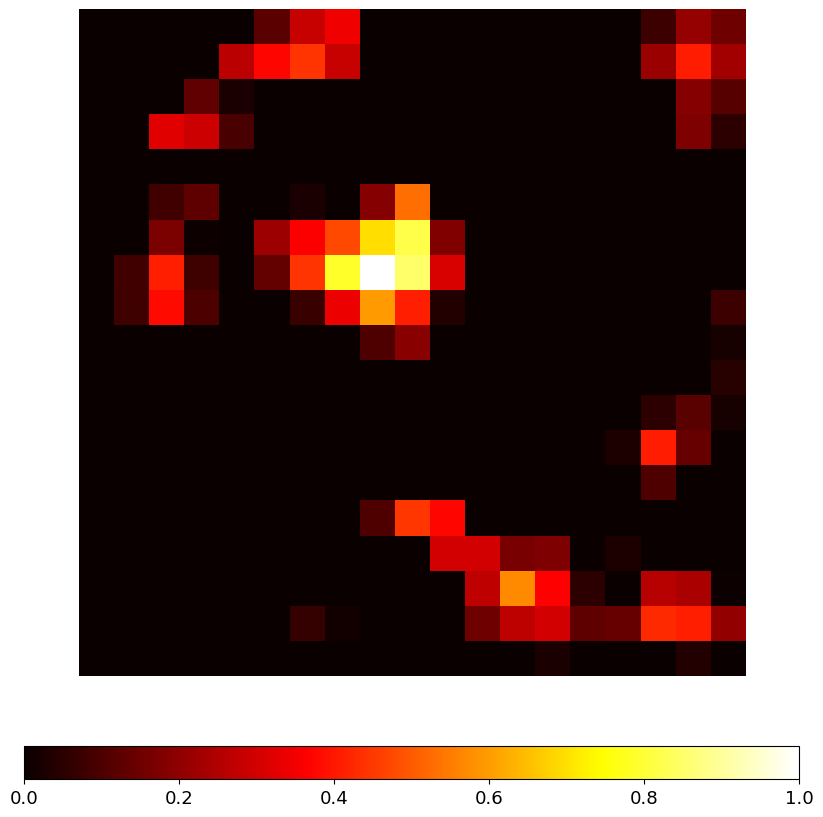

In [25]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Asumiendo que `heatmap` es el mapa de calor que has calculado con Grad-CAM
heatmap_np = heatmap.cpu().numpy()  # Convertir el tensor a un array de NumPy para visualización

# Crear la figura y el diseño de gridspec
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[20, 1])  # 20 para el heatmap y 1 para la barra de color

# Crear el subplot para el heatmap
ax = fig.add_subplot(gs[0])
cax = ax.imshow(heatmap_np, cmap='hot')  # 'hot' es una buena elección de mapa de colores, pero puedes elegir otro

# Ocultar las marcas y etiquetas de los ejes
ax.axis('off')  # Esto oculta las marcas y las etiquetas de los ejes

# Crear el subplot para la barra de color debajo del heatmap
cbar_ax = fig.add_subplot(gs[1])

# Añadir la barra de colores
cbar = fig.colorbar(cax, cax=cbar_ax, orientation='horizontal')
cbar_ax.xaxis.set_ticks_position('bottom')

# Ajustar el tamaño de la fuente de las etiquetas de la barra de colores
cbar.ax.tick_params(labelsize=13)

# Guardar la figura
fig.savefig('../Figures/heatmap_gradCAM.png', dpi=300, bbox_inches='tight')

# Mostrar la figura
plt.show()


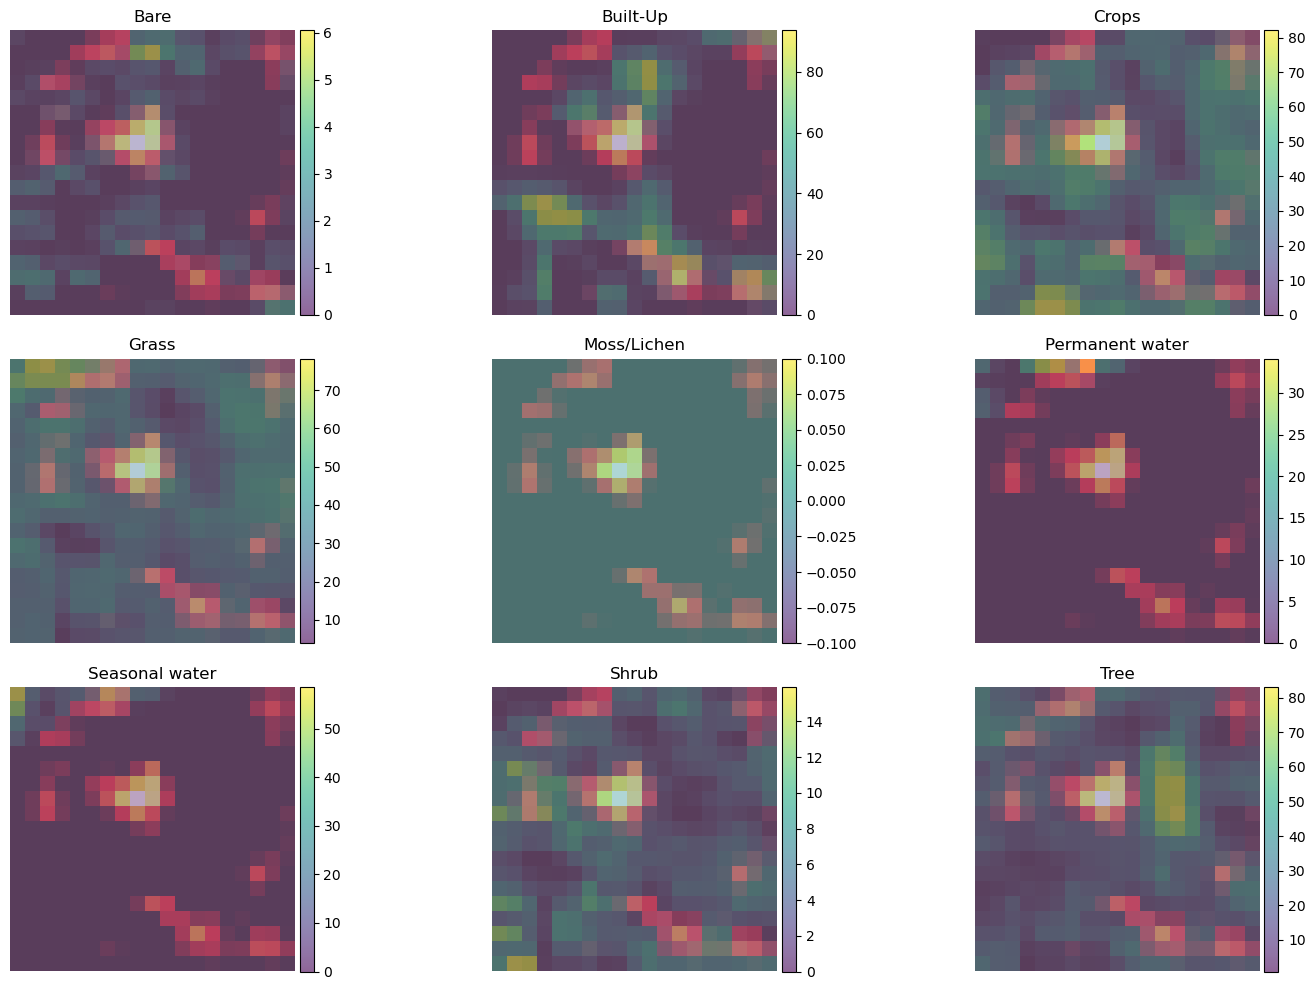

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Asumiendo que input_tensor es de la forma [1, 9, height, width]
# Asumiendo que heatmap es un tensor de la forma [height, width]
# Asegúrate de que el heatmap es del mismo tamaño que las capas del input_tensor

# Nombrar las capas según la información proporcionada
layer_names = [
    "Bare", "Built-Up", "Crops", "Grass", "Moss/Lichen",
    "Permanent water", "Seasonal water", "Shrub", "Tree"
]

# Crear una figura para plotear
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # Ajusta el tamaño como sea necesario

# Iterar sobre cada capa
for i, ax in enumerate(axes.flatten()):
    # Mostrar la imagen de la capa
    im = ax.imshow(input_tensor[0, i, :, :], cmap='viridis', alpha=0.6)  # Imagen de fondo con cierta transparencia
    
    # Superponer el heatmap de Grad-CAM
    # Asegúrate de que el heatmap esté normalizado o ajusta su escala adecuadamente
    ax.imshow(heatmap, cmap='hot', alpha=0.4)  # Superposición con transparencia

    ax.set_title(layer_names[i])
    ax.axis('off')  # Desactivar los ejes para una mejor visualización

    # Crear una nueva división para la barra de colores de la capa
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Agregar la barra de colores para la capa
    plt.colorbar(im, cax=cax)

plt.tight_layout()
plt.show()

# Guardar la figura
fig.savefig('../Figures/LC_with_heatmap_gradCAM.png', dpi=300, bbox_inches='tight')

In [27]:
import numpy as np

# Asumiendo que input_tensor es de la forma [1, 9, height, width]
# y heatmap es de la forma [height, width]
input_tensor_squeeze = input_tensor.squeeze(0)  # Elimina la dimensión batch si está presente

# Correlaciones entre el heatmap y cada capa
correlations = []

for i in range(input_tensor_squeeze.shape[0]):  # Iterar sobre el número de capas
    layer_data = input_tensor_squeeze[i, :, :].numpy()  # Convertir la capa a NumPy array
    heatmap_data = heatmap.numpy()  # Asegúrate de que el heatmap está en forma NumPy

    # Aplanar los datos para correlación
    layer_flat = layer_data.flatten()
    heatmap_flat = heatmap_data.flatten()

    # Calcular la correlación de Pearson
    correlation = np.corrcoef(layer_flat, heatmap_flat)[0, 1]
    correlations.append(correlation)

    # Imprimir la correlación para cada capa
    print(f"Correlación entre el heatmap y la capa {i} ({layer_names[i]}): {correlation:.3f}")

Correlación entre el heatmap y la capa 0 (Bare): 0.065
Correlación entre el heatmap y la capa 1 (Built-Up): 0.054
Correlación entre el heatmap y la capa 2 (Crops): -0.025
Correlación entre el heatmap y la capa 3 (Grass): 0.006
Correlación entre el heatmap y la capa 4 (Moss/Lichen): nan
Correlación entre el heatmap y la capa 5 (Permanent water): 0.045
Correlación entre el heatmap y la capa 6 (Seasonal water): 0.028
Correlación entre el heatmap y la capa 7 (Shrub): 0.023
Correlación entre el heatmap y la capa 8 (Tree): -0.082


C:\Users\alfon\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\alfon\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


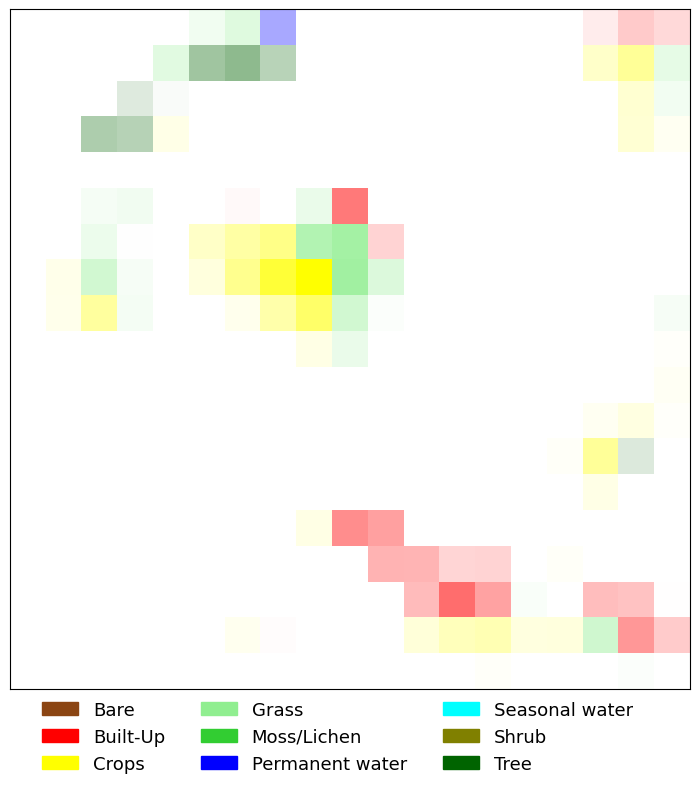

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, to_rgb
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Asumiendo que 'dominant_image' y 'heatmap' están definidos
# Asegurarse de que el heatmap está normalizado
normalized_heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())

# Crear una imagen RGBA para `dominant_image` donde el canal alfa se ajusta según el heatmap
dominant_rgba_image = np.zeros((*dominant_image.shape[:2], 4), dtype=np.float32)  # Crear imagen RGBA

for i in range(3):  # Copiar los canales RGB
    dominant_rgba_image[..., i] = dominant_image[..., i] / 255.0  # Normalizar y copiar
dominant_rgba_image[..., 3] = normalized_heatmap  # Ajustar el canal alfa usando el heatmap

# Configurar la visualización
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dominant_rgba_image)  # Mostrar la imagen RGBA
ax.axis('on')  # Mostrar los ejes


# Definir la paleta de colores y las etiquetas para la leyenda de `dominant_image`
color_map = {
    "Bare": 'saddlebrown',
    "Built-Up": 'red',
    "Crops": 'yellow',
    "Grass": 'lightgreen',
    "Moss/Lichen": 'limegreen',
    "Permanent water": 'blue',
    "Seasonal water": 'cyan',
    "Shrub": 'olive',
    "Tree": 'darkgreen'
}
patches = [mpatches.Patch(color=to_rgb(color), label=label) for label, color in color_map.items()]

# Añadir la leyenda al gráfico debajo de la figura
fig.legend(handles=patches, loc='lower center', bbox_to_anchor=(0.5, 0.1), ncol=3, frameon=False, fontsize=13)

# Ajustar los márgenes para que haya espacio para la leyenda
plt.subplots_adjust(bottom=0.2)

# Ocultar las etiquetas de los ejes
ax.xaxis.set_ticks([])  # Oculta las etiquetas y marcas del eje x
ax.yaxis.set_ticks([])  # Oculta las etiquetas y marcas del eje y

plt.show()
fig.savefig('../Figures/DomLC_with_gradCAM.png', dpi=300, bbox_inches='tight')

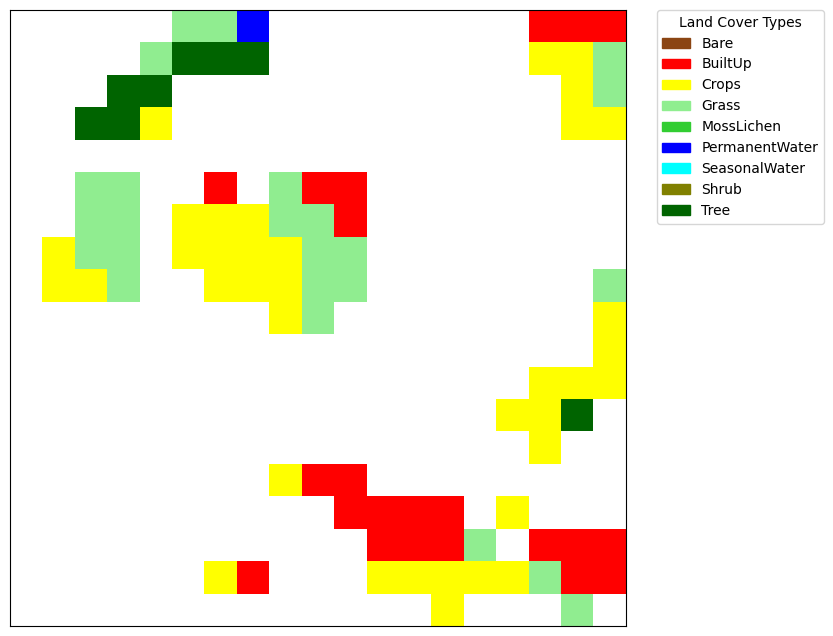

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, to_rgb
from matplotlib.cm import ScalarMappable
import matplotlib.patches as mpatches

# Asumiendo que 'dominant_image' y 'heatmap' están definidos
# Asegurarse de que el heatmap está normalizado
normalized_heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())

# Crear una imagen RGBA para `dominant_image` donde el canal alfa se ajusta según el heatmap
dominant_rgba_image = np.zeros((*dominant_image.shape[:2], 4), dtype=np.float32)  # Crear imagen RGBA

for i in range(3):  # Copiar los canales RGB
    dominant_rgba_image[..., i] = np.around(dominant_image[..., i] / 255.0, 7)  # Normalizar y copiar

########################################################
# Ajustar el canal alfa usando el heatmap con el umbral
threshold = 0.0
#######################################################


alpha_channel = np.where(normalized_heatmap > threshold, 1.0, 0) #normalized_heatmap, 0)
dominant_rgba_image[..., 3] = alpha_channel  # Aplicar el canal alfa modificado

# Configurar la visualización
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(dominant_rgba_image)  # Mostrar la imagen RGBA
ax.axis('on')  # Mostrar los ejes

# Definir la paleta de colores y las etiquetas para la leyenda de `dominant_image`
color_map = {
    "Bare": 'saddlebrown',
    "BuiltUp": 'red',
    "Crops": 'yellow',
    "Grass": 'lightgreen',
    "MossLichen": 'limegreen',
    "PermanentWater": 'blue',
    "SeasonalWater": 'cyan',
    "Shrub": 'olive',
    "Tree": 'darkgreen'
}
patches = [mpatches.Patch(color=to_rgb(color), label=label) for label, color in color_map.items()]

# Ocultar las etiquetas de los ejes
ax.xaxis.set_ticks([])  # Oculta las etiquetas y marcas del eje x
ax.yaxis.set_ticks([])  # Oculta las etiquetas y marcas del eje y

# Añadir la leyenda para la cobertura de suelo
legend = ax.legend(handles=patches, loc='upper left', title="Land Cover Types", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()
fig.savefig('../Figures/DomLC_active_pixels.png', dpi=300, bbox_inches='tight')

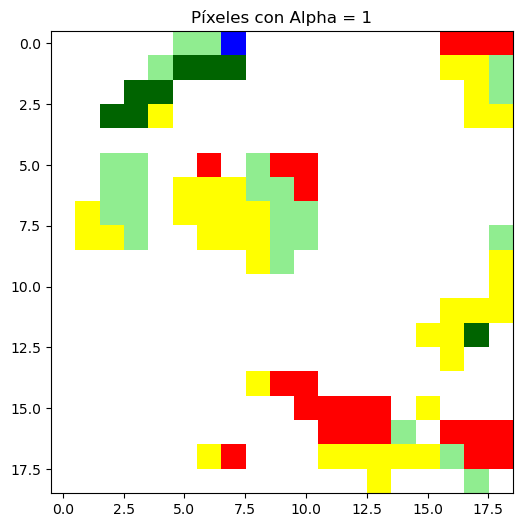

In [48]:
# Asumiendo que `dominant_rgba_image` es tu imagen RGBA original
alpha_mask = dominant_rgba_image[..., 3] == 1

# Crear una imagen de salida que será una copia de la imagen original
output_image = np.zeros_like(dominant_rgba_image)

# Copiar solo los píxeles donde el alfa es 1
output_image[alpha_mask] = dominant_rgba_image[alpha_mask]

# Visualizar la imagen resultante, que ahora resaltará los píxeles con alfa = 1
plt.figure(figsize=(10, 6))
plt.imshow(output_image)
plt.title("Píxeles con Alpha = 1")
plt.axis('on')  # Ocultar los ejes para una visualización limpia
plt.show()

In [49]:
import numpy as np
from skimage import measure, color
import matplotlib.pyplot as plt

# Convertir la imagen RGB (ignorando el alfa) a una imagen binaria donde hay píxeles no negros
binary_image = np.any(output_image[..., :3] > 0, axis=-1)  # True donde hay color

# Aplicar etiquetado de componentes conectadas sobre la imagen binaria
labeled_image = measure.label(binary_image, connectivity=2)  # Conexiones diagonales incluidas

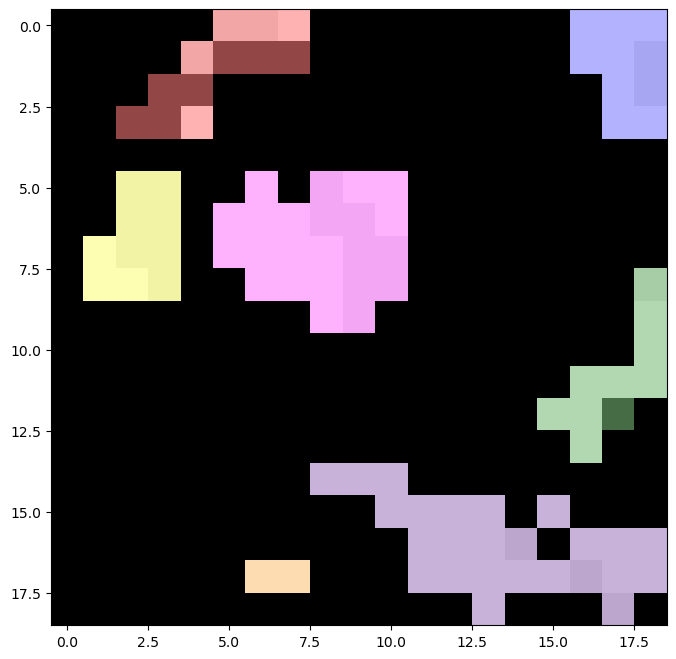

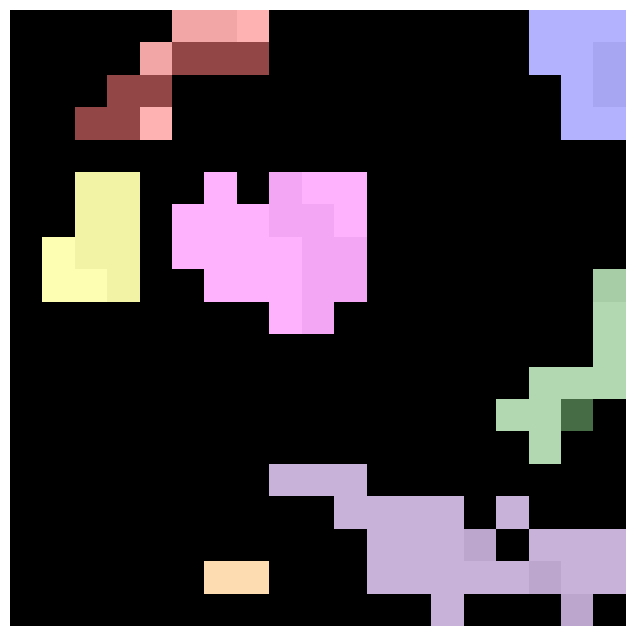

In [56]:
# Asegúrate de que output_image solo contenga canales RGB
if output_image.shape[-1] == 4:  # Si todavía incluye el canal alfa
    output_image = output_image[..., :3]  # Tomar solo los tres primeros canales (RGB)

# Ahora intenta aplicar label2rgb nuevamente
from skimage import color

image_labeled = color.label2rgb(labeled_image, output_image, kind='overlay', bg_label=0)
plt.figure(figsize=(10, 8))
plt.imshow(image_labeled)
#plt.title("Componentes Conectadas")

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(image_labeled)  # Mostrar la imagen RGBA
ax.axis('off')  # No mostrar los ejes

plt.show()
fig.savefig('../Figures/clusters_active_pixels.png', dpi=300, bbox_inches='tight')

Shape of labeled_image: (19, 19)
Shape of output_image: (19, 19, 3)


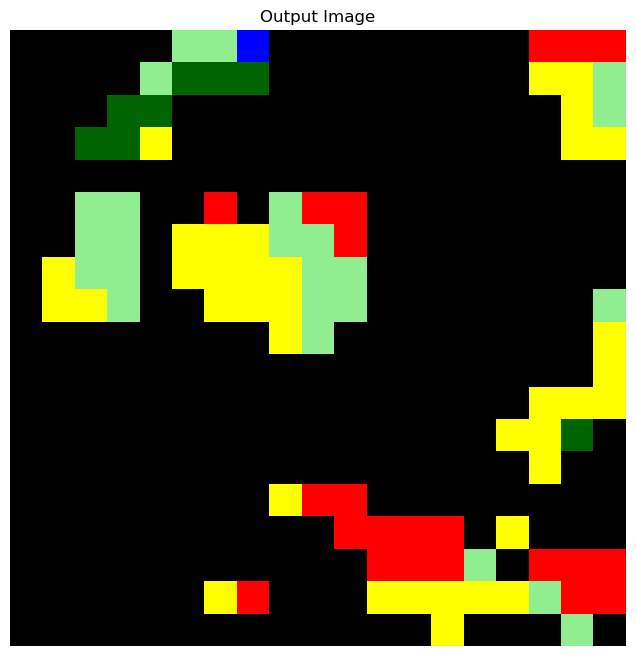

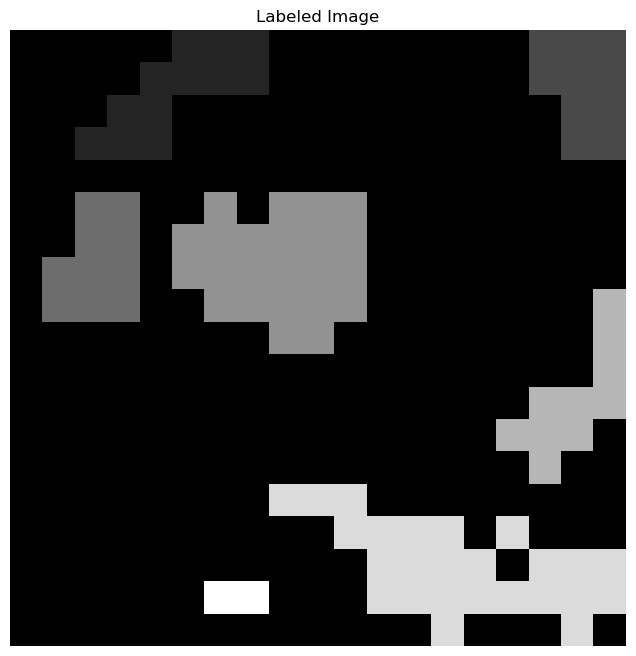

image_labeled dtype: float64
image_labeled min value: 0.0
image_labeled max value: 0.9999999880790711


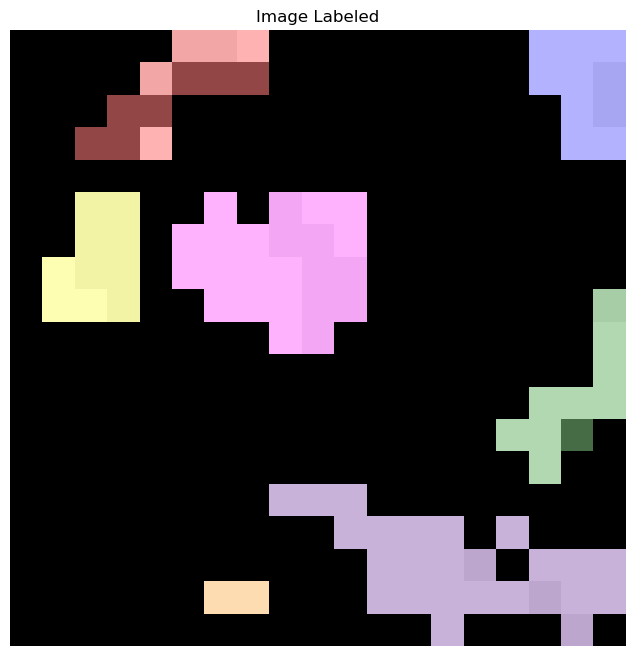

<Figure size 640x480 with 0 Axes>

In [55]:
# Verificar las dimensiones de las imágenes
print("Shape of labeled_image:", labeled_image.shape)
print("Shape of output_image:", output_image.shape)

# Asegúrate de que output_image solo contenga canales RGB
if output_image.shape[-1] == 4:  # Si todavía incluye el canal alfa
    output_image = output_image[..., :3]  # Tomar solo los tres primeros canales (RGB)

# Mostrar las imágenes individuales para ver si los datos están cargados correctamente
plt.figure(figsize=(10, 8))
plt.imshow(output_image)
plt.title("Output Image")
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(labeled_image, cmap='gray')
plt.title("Labeled Image")
plt.axis('off')
plt.show()

# Ahora intenta aplicar label2rgb nuevamente
from skimage import color

image_labeled = color.label2rgb(labeled_image, output_image, kind='overlay', bg_label=0)

# Verificar que image_labeled no esté vacío
print("image_labeled dtype:", image_labeled.dtype)
print("image_labeled min value:", image_labeled.min())
print("image_labeled max value:", image_labeled.max())

# Mostrar image_labeled para asegurarnos de que se generó correctamente
plt.figure(figsize=(10, 8))
plt.imshow(image_labeled)
plt.title("Image Labeled")
plt.axis('off')
plt.show()

# Asegúrate de guardar la imagen correcta
fig = plt.gcf()  # Obtén la figura actual
fig.savefig('../Figures/clusters_active_pixels.png', dpi=300, bbox_inches='tight')

In [40]:
import numpy as np
import pandas as pd

# Preparar los datos para el DataFrame
data = {
    'x': [],
    'y': [],
    'cluster_label': [],
    'grad_cam_value': []
}

# Iterar sobre cada píxel en la imagen etiquetada
for (x, y), label in np.ndenumerate(labeled_image):
    data['x'].append(x)
    data['y'].append(y)
    data['cluster_label'].append(label)
    # Extraer el valor del tensor usando .item() y añadirlo al DataFrame
    data['grad_cam_value'].append(heatmap[x, y].item())

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

      x   y  cluster_label  grad_cam_value
0     0   0              0        0.000000
1     0   1              0        0.000000
2     0   2              0        0.000000
3     0   3              0        0.000000
4     0   4              0        0.000000
..   ..  ..            ...             ...
356  18  14              0        0.000000
357  18  15              0        0.000000
358  18  16              0        0.000000
359  18  17              6        0.035322
360  18  18              0        0.000000

[361 rows x 4 columns]


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Supongamos que dominant_image es tu imagen numpy array de dimensiones [H, W, 3]
# Primero, definimos color_map con los nombres de color a RGB
color_map_rgb = {
    0: mcolors.to_rgb('saddlebrown'),  # Bare
    1: mcolors.to_rgb('red'),          # BuiltUp
    2: mcolors.to_rgb('yellow'),       # Crops
    3: mcolors.to_rgb('lightgreen'),   # Grass
    4: mcolors.to_rgb('limegreen'),    # MossLichen
    5: mcolors.to_rgb('blue'),         # PermanentWater
    6: mcolors.to_rgb('cyan'),         # SeasonalWater
    7: mcolors.to_rgb('olive'),        # Shrub
    8: mcolors.to_rgb('darkgreen')     # Tree
}

data_landcover = {'x': [], 'y': [], 'site': [], 'land_cover': []}

# Iterar sobre cada píxel en la imagen
for x in range(dominant_image.shape[0]):
    for y in range(dominant_image.shape[1]):
        # Obtener el color del píxel en dominat_image
        pixel_color = dominant_image[x, y, :]

        # Encontrar la cobertura terrestre más cercana que coincide con el color del píxel
        closest_land_cover = None
        min_distance = float('inf')
        for land_cover_id, rgb in color_map_rgb.items():
            distance = np.linalg.norm(pixel_color - np.array(rgb))
            if distance < min_distance:
                min_distance = distance
                closest_land_cover = land_cover_id

        # Añadir los datos al diccionario
        data_landcover['x'].append(x)
        data_landcover['y'].append(y)
        data_landcover['site'].append(input_tensor_number)
        data_landcover['land_cover'].append(labels[closest_land_cover])

# Crear DataFrame
df_landcover = pd.DataFrame(data_landcover)

# Mostrar el DataFrame
print(df_landcover)

      x   y  site      land_cover
0     0   0    90  Seasonal Water
1     0   1    90           Grass
2     0   2    90           Grass
3     0   3    90           Grass
4     0   4    90           Grass
..   ..  ..   ...             ...
356  18  14    90           Crops
357  18  15    90           Crops
358  18  16    90           Crops
359  18  17    90           Grass
360  18  18    90           Grass

[361 rows x 4 columns]


In [42]:
import pandas as pd

# Asumiendo que df y df_landcover ya están definidos como en tu descripción
# Realizar el left join
df_merged = pd.merge(df_landcover, df, on=['x', 'y'], how='left')

# Mostrar las primeras filas del DataFrame resultante para verificar
print(df_merged.head())

   x  y  site      land_cover  cluster_label  grad_cam_value
0  0  0    90  Seasonal Water              0             0.0
1  0  1    90           Grass              0             0.0
2  0  2    90           Grass              0             0.0
3  0  3    90           Grass              0             0.0
4  0  4    90           Grass              0             0.0


In [94]:
# Calcular cuántas filas hay para cada cluster_label
cluster_counts = df['cluster_label'].value_counts()

# Imprimir los resultados
print(cluster_counts)

cluster_label
0    298
2     41
1      7
3      7
4      3
6      3
5      2
Name: count, dtype: int64


In [95]:
# Obtener los valores únicos de cluster_label excluyendo el cero
unique_labels = df_merged['cluster_label'].unique()
unique_labels = unique_labels[unique_labels != 0]  # Excluir el label 0

# Recorrer cada label y obtener la información requerida
for label in unique_labels:
    # Filtrar el DataFrame para el cluster_label actual
    cluster_data = df_merged[df_merged['cluster_label'] == label]
    
    # Contar cuántas filas hay para este cluster_label
    count = cluster_data.shape[0]
    
    # Extraer los valores únicos de land_cover para este cluster_label
    unique_land_covers = cluster_data['land_cover']
    
    # Imprimir la información
    print(f"Cluster Label: {label}")
    print(f"Count: {count}")
    print(f"Land Covers in this Cluster: \n{unique_land_covers}"+"\n")

Cluster Label: 1
Count: 7
Land Covers in this Cluster: 
49    Crops
50    Crops
67    Crops
68    Crops
69    Crops
86    Grass
87    Grass
Name: land_cover, dtype: object

Cluster Label: 2
Count: 41
Land Covers in this Cluster: 
57     Built-Up
58     Built-Up
59     Built-Up
76     Built-Up
77     Built-Up
78     Built-Up
95     Built-Up
96     Built-Up
97     Built-Up
98     Built-Up
114    Built-Up
115    Built-Up
116    Built-Up
133    Built-Up
134    Built-Up
135    Built-Up
136    Built-Up
152    Built-Up
153    Built-Up
154    Built-Up
155    Built-Up
171    Built-Up
172    Built-Up
173    Built-Up
174    Built-Up
190    Built-Up
191    Built-Up
192    Built-Up
193       Grass
209    Built-Up
210    Built-Up
211    Built-Up
212       Crops
228       Grass
231    Built-Up
251    Built-Up
270    Built-Up
271    Built-Up
289    Built-Up
290    Built-Up
291    Built-Up
Name: land_cover, dtype: object

Cluster Label: 3
Count: 7
Land Covers in this Cluster: 
121       Crops
140      

In [96]:
# Obtener los valores únicos de cluster_label excluyendo el cero
unique_labels = df_merged['cluster_label'].unique()
unique_labels = unique_labels[unique_labels == 0]  # Solo el label 0

# Recorrer cada label y obtener la información requerida
for label in unique_labels:
    # Filtrar el DataFrame para el cluster_label actual
    cluster_data = df_merged[df_merged['cluster_label'] == label]
    
    # Contar cuántas filas hay para este cluster_label
    count = cluster_data.shape[0]
    
    # Extraer los valores únicos de land_cover para este cluster_label
    unique_land_covers = cluster_data['land_cover']
    
    # Imprimir la información
    print(f"Cluster Label: {label}")
    print(f"Count: {count}")
    print(f"Land Covers in this Cluster: \n{unique_land_covers}"+"\n")

Cluster Label: 0
Count: 298
Land Covers in this Cluster: 
0      Grass
1      Grass
2      Crops
3      Grass
4      Grass
       ...  
356    Grass
357    Grass
358    Grass
359    Crops
360    Grass
Name: land_cover, Length: 298, dtype: object



In [103]:
# Suponiendo que df_landcover es tu DataFrame
selected_rows = df_landcover[df_landcover['y'] == 12]

# Mostrar el resultado
print(selected_rows) # Error no se ve el arbusto de la esquina superior derecha de dominant-image

      x   y  site land_cover
12    0  12     4      Grass
31    1  12     4      Grass
50    2  12     4      Crops
69    3  12     4      Crops
88    4  12     4      Grass
107   5  12     4      Grass
126   6  12     4   Built-Up
145   7  12     4   Built-Up
164   8  12     4   Built-Up
183   9  12     4      Grass
202  10  12     4   Built-Up
221  11  12     4      Grass
240  12  12     4      Grass
259  13  12     4      Grass
278  14  12     4   Built-Up
297  15  12     4      Crops
316  16  12     4      Grass
335  17  12     4      Grass
354  18  12     4      Grass


In [120]:
import numpy as np

# Mapeo de nombres de colores a RGB (valores de ejemplo, ajustar según sea necesario)
rgb_color_map = {
    'saddlebrown': [139, 69, 19],
    'red': [255, 0, 0],
    'yellow': [255, 255, 0],
    'lightgreen': [144, 238, 144],
    'limegreen': [50, 205, 50],
    'blue': [0, 0, 255],
    'cyan': [0, 255, 255],
    'olive': [128, 128, 0],
    'darkgreen': [0, 100, 0]
}

# Invierte el color_map para obtener un mapeo de RGB a ID
rgb_to_id = {tuple(value): key for key, value in rgb_color_map.items()}


id_to_color = {
    0: 'saddlebrown',   # Bare
    1: 'red',           # BuiltUp
    2: 'yellow',        # Crops
    3: 'lightgreen',    # Grass
    4: 'limegreen',     # MossLichen
    5: 'blue',          # PermanentWater
    6: 'cyan',          # SeasonalWater
    7: 'olive',         # Shrub
    8: 'darkgreen'      # Tree
}

In [121]:
def map_pixels_to_ids(image):
    # Asignar un ID por defecto para píxeles no mapeados
    id_image = np.full((image.shape[0], image.shape[1]), -1, dtype=int)
    
    # Convertir la imagen a una lista de tuplas para búsqueda eficiente
    flattened_image = [tuple(pixel) for pixel in image.reshape(-1, image.shape[2])]
    
    # Mapear cada pixel utilizando el diccionario, con un ID por defecto si no se encuentra
    id_flat = [rgb_to_id.get(pixel, -1) for pixel in flattened_image]
    
    # Reconstruir la imagen de IDs
    id_image = np.array(id_flat).reshape(image.shape[0], image.shape[1])
    
    return id_image

# Aplicar la función a la imagen
color_matrix = map_pixels_to_ids(dominant_image)
print(color_matrix)

[['lightgreen' 'lightgreen' 'darkgreen' 'lightgreen' 'lightgreen'
  'lightgreen' 'lightgreen' 'lightgreen' 'yellow' 'yellow' 'yellow'
  'yellow' 'lightgreen' 'yellow' 'yellow' 'lightgreen' 'lightgreen'
  'lightgreen' 'lightgreen']
 ['red' 'red' 'red' 'lightgreen' 'lightgreen' 'lightgreen' 'lightgreen'
  'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'lightgreen' 'lightgreen'
  'yellow' 'lightgreen' 'lightgreen' 'lightgreen' 'yellow']
 ['red' 'red' 'red' 'red' 'lightgreen' 'yellow' 'yellow' 'yellow'
  'yellow' 'yellow' 'yellow' 'yellow' 'saddlebrown' 'lightgreen'
  'lightgreen' 'lightgreen' 'lightgreen' 'yellow' 'yellow']
 ['red' 'red' 'red' 'red' 'lightgreen' 'saddlebrown' 'saddlebrown'
  'lightgreen' 'yellow' 'yellow' 'yellow' 'yellow' 'yellow' 'lightgreen'
  'lightgreen' 'lightgreen' 'lightgreen' 'lightgreen' 'lightgreen']
 ['red' 'red' 'red' 'red' 'red' 'lightgreen' 'lightgreen' 'lightgreen'
  'lightgreen' 'lightgreen' 'lightgreen' 'lightgreen' 'lightgreen'
  'lightgreen' 'lightgreen'

In [122]:
# Mapeo directo de ID a nombre de color
id_to_color = {
    0: 'saddlebrown',   # Bare
    1: 'red',           # BuiltUp
    2: 'yellow',        # Crops
    3: 'lightgreen',    # Grass
    4: 'limegreen',     # MossLichen
    5: 'blue',          # PermanentWater
    6: 'cyan',          # SeasonalWater
    7: 'olive',         # Shrub
    8: 'darkgreen'      # Tree
}

# Etiquetas para cada ID
labels = {
    0: "Bare",
    1: "Built-Up",
    2: "Crops",
    3: "Grass",
    4: "Moss/Lichen",
    5: "Permanent Water",
    6: "Seasonal Water",
    7: "Shrub",
    8: "Tree"
}

# Crear un diccionario para mapear de color a etiqueta de cobertura terrestre
color_to_label = {color: labels[id] for id, color in id_to_color.items()}
# Convertir los nombres de colores en etiquetas de cobertura terrestre
label_matrix = [[color_to_label.get(color, 'Unknown') for color in row] for row in color_matrix]

print(label_matrix)

[['Grass', 'Grass', 'Tree', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Crops', 'Crops', 'Crops', 'Crops', 'Grass', 'Crops', 'Crops', 'Grass', 'Grass', 'Grass', 'Grass'], ['Built-Up', 'Built-Up', 'Built-Up', 'Grass', 'Grass', 'Grass', 'Grass', 'Crops', 'Crops', 'Crops', 'Crops', 'Crops', 'Grass', 'Grass', 'Crops', 'Grass', 'Grass', 'Grass', 'Crops'], ['Built-Up', 'Built-Up', 'Built-Up', 'Built-Up', 'Grass', 'Crops', 'Crops', 'Crops', 'Crops', 'Crops', 'Crops', 'Crops', 'Bare', 'Grass', 'Grass', 'Grass', 'Grass', 'Crops', 'Crops'], ['Built-Up', 'Built-Up', 'Built-Up', 'Built-Up', 'Grass', 'Bare', 'Bare', 'Grass', 'Crops', 'Crops', 'Crops', 'Crops', 'Crops', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass'], ['Built-Up', 'Built-Up', 'Built-Up', 'Built-Up', 'Built-Up', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Grass', 'Crops', 'Grass', 'Grass', 'Grass'], ['Built-Up', 'Built-Up', 'Built-Up', 'Built-Up', 'Built-Up', 'Grass', 'Grass', 'Crops', 'G

In [123]:
# Crear una lista para almacenar los diccionarios
data_landcover2 = []

# Iterar sobre cada fila y cada columna en la matriz
for y, row in enumerate(label_matrix):
    for x, label in enumerate(row):
        # Crear un diccionario para cada celda y añadirlo a la lista
        data_landcover2.append({
            'x': x,
            'y': y,
            'land_cover': label
        })

# Crear un DataFrame desde la lista de diccionarios
df_landcover2 = pd.DataFrame(data_landcover2)

# Mostrar el DataFrame
print(df_landcover2)

      x   y land_cover
0     0   0      Grass
1     1   0      Grass
2     2   0       Tree
3     3   0      Grass
4     4   0      Grass
..   ..  ..        ...
356  14  18      Grass
357  15  18      Grass
358  16  18      Grass
359  17  18       Tree
360  18  18      Grass

[361 rows x 3 columns]


In [124]:
# Suponiendo que la columna se llama 'land_cover' en el DataFrame 'data_landcover2'
unique_land_covers = df_landcover2['land_cover'].unique()

# Mostrar los valores únicos
print(unique_land_covers)


['Grass' 'Tree' 'Crops' 'Built-Up' 'Bare' 'Shrub']


In [125]:
# Asumiendo que df_landcover2 es tu DataFrame y 'land_cover' es el nombre de la columna
filtered_data = df_landcover2[df_landcover2['land_cover'] == "Unknown"]

# Mostrar los resultados
print(filtered_data)
dominant_image[3,5]

Empty DataFrame
Columns: [x, y, land_cover]
Index: []


array([139,  69,  19], dtype=uint8)

In [126]:
# Suponiendo que df_landcover es tu DataFrame
selected_rows2 = df_landcover2[df_landcover2['y'] == 0]

# Mostrar el resultado
print(selected_rows2)

     x  y land_cover
0    0  0      Grass
1    1  0      Grass
2    2  0       Tree
3    3  0      Grass
4    4  0      Grass
5    5  0      Grass
6    6  0      Grass
7    7  0      Grass
8    8  0      Crops
9    9  0      Crops
10  10  0      Crops
11  11  0      Crops
12  12  0      Grass
13  13  0      Crops
14  14  0      Crops
15  15  0      Grass
16  16  0      Grass
17  17  0      Grass
18  18  0      Grass
